In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# 1. Read the dataset to python environment

In [2]:
#reading the data
data = pd.read_excel(r"D:\iris.xls")
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# 2. Do the necessary pre-processing steps

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
data.isnull().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

In [5]:
data.describe()

,SL,SW,PL,PW
count,143.000000,144.000000,144.000000,150.000000
mean,5.855944,3.049306,3.756250,1.198667
std,0.828168,0.430644,1.761306,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


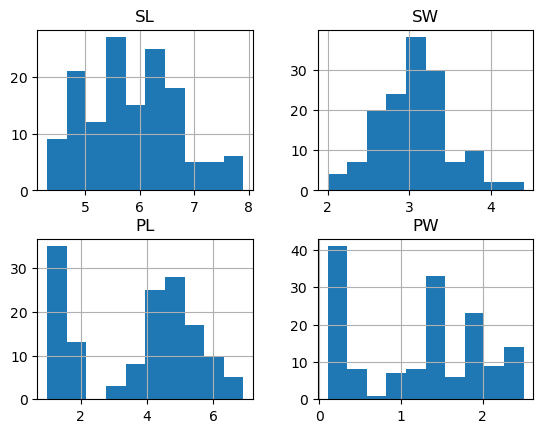

In [6]:
#idetifying method to fill missing values
data.hist();

In [7]:
#we can fill the missing values with median as the graphs are skewed
for i in ['SL', 'SW', 'PL']:
    data[i] = data[i].fillna(data[i].median())

In [8]:
data.isnull().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

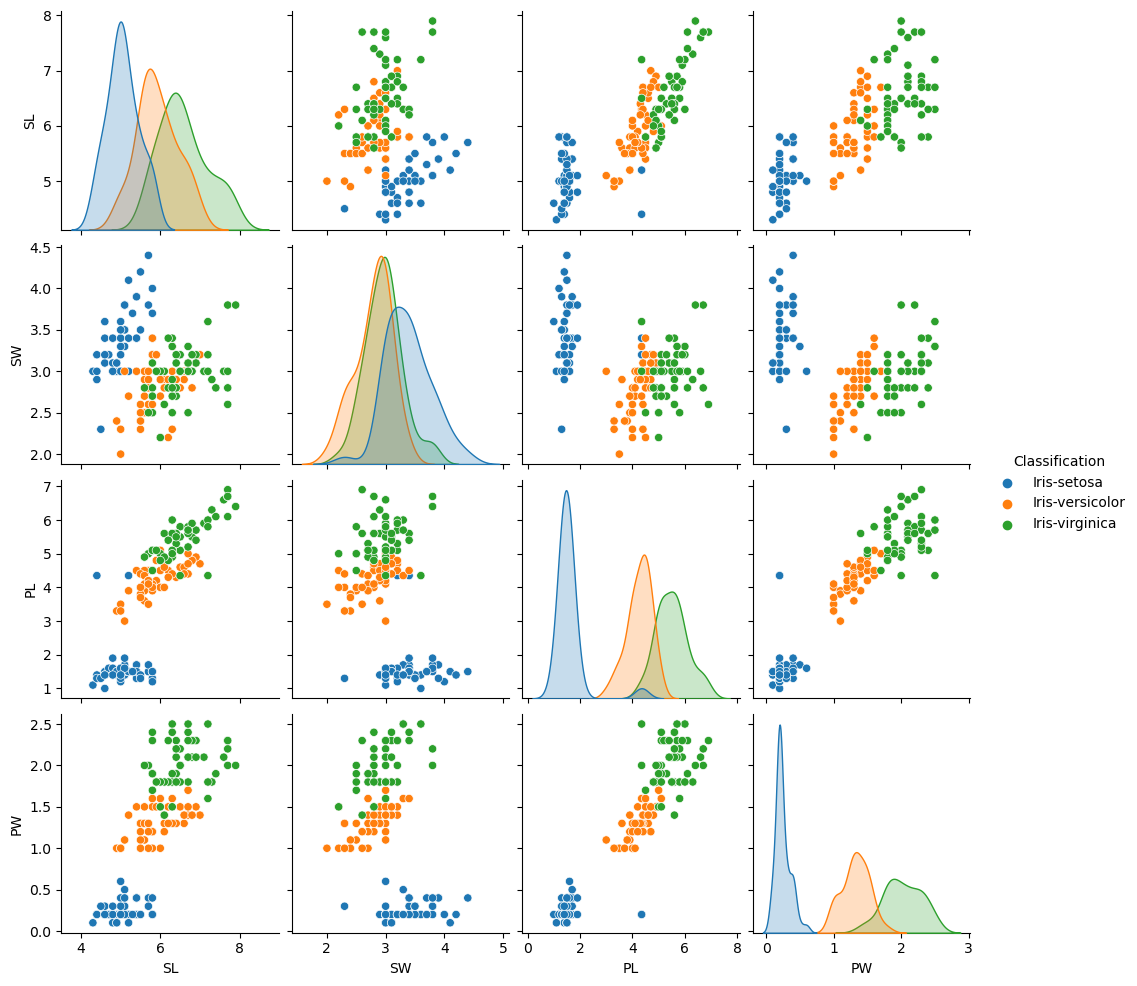

In [9]:
#visualize the dataset
sns.pairplot(data, hue="Classification")

In [10]:
#splitting the data and target
X = data.drop("Classification", axis=1)
y= data.Classification

In [11]:
#Splitting the Data into Training Data and Test Data
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

# 3. Find out which classification model gives the best result (also do random forest algorithm)

In [13]:
#Without scaling

In [14]:
#1. LogisticRegression 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

In [15]:
lr = LogisticRegression(solver='lbfgs',class_weight='balanced', max_iter=10000)
lr = lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

In [16]:
confusion_matrix(y_test, y_pred_lr)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

In [17]:
acc_lr = accuracy_score(y_test, y_pred_lr)
print('The Accurcy Score of Logistic Regression without scaling=',round(acc_lr,5))

The Accurcy Score of Logistic Regression without scaling= 1.0


In [18]:
#2. KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

In [19]:
metric_k=[]
neighbors=range(3,15)
for k in neighbors:
    Classifier=KNeighborsClassifier(n_neighbors=k)
    Classifier=Classifier.fit(X_train,y_train)
    y_pred_knn=Classifier.predict(X_test)
    acc_knn=accuracy_score(y_test,y_pred_knn)
    metric_k.append(acc_knn)

C:\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avo

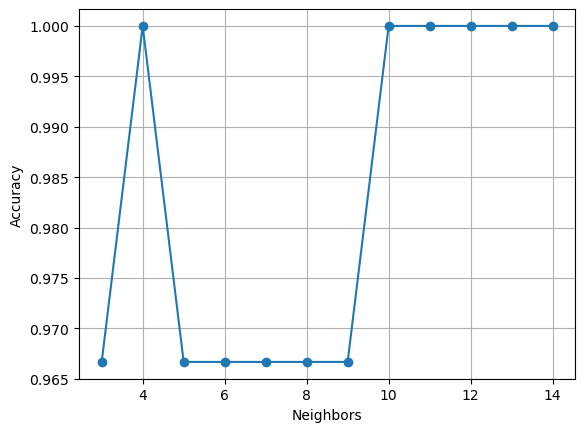

In [20]:
plt.plot(neighbors,metric_k,'o-')
plt.xlabel('Neighbors')
plt.ylabel('Accuracy')
plt.grid()

In [21]:
#selecting the negibor which gives highest accuracy
Classifier=KNeighborsClassifier(n_neighbors=3)
Classifier=Classifier.fit(X_train,y_train)
y_KNN_predict=Classifier.predict(X_test)

C:\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [22]:
confusion_matrix(y_test,y_KNN_predict)

array([[10,  0,  0],
       [ 0,  8,  1],
       [ 0,  0, 11]], dtype=int64)

In [23]:
acc_knn=accuracy_score(y_test,y_KNN_predict)
print('The Accurcy Score of KNN without scaling is ',round(acc_knn,5))

The Accurcy Score of KNN without scaling is  0.96667


In [24]:
#3. SVM using linear kernel
from sklearn.svm import SVC

In [25]:
clf_svm = SVC(kernel='linear')
clf_svm = clf_svm.fit(X_train, y_train)
y_pred_svm = clf_svm.predict(X_test)

In [26]:
confusion_matrix(y_test, y_pred_svm)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

In [27]:
acc_svm = accuracy_score(y_test, y_pred_svm)
print('The Accurcy Score of SVM without scaling using linear kernel is ',round(acc_svm,5))

The Accurcy Score of SVM without scaling using linear kernel is  1.0


In [28]:
#4. SVM using rbf kernel

In [29]:
clf_svm2 = SVC(kernel = 'rbf')
clf_svm2 = clf_svm2.fit(X_train, y_train)
y_pred_svm2 = clf_svm2.predict(X_test)

In [30]:
confusion_matrix(y_test, y_pred_svm2)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

In [31]:
acc_svm2 = accuracy_score(y_test, y_pred_svm2)
print('The Accurcy Score of SVM without scaling using rbf kernel is ',round(acc_svm2,5))

The Accurcy Score of SVM without scaling using rbf kernel is  1.0


In [32]:
#5. Decision Tree Method
from sklearn.tree import DecisionTreeClassifier

In [33]:
clf_dt=DecisionTreeClassifier()
clf_dt = clf_dt.fit(X_train, y_train)
y_pred_dt = clf_dt.predict(X_test)

In [34]:
confusion_matrix(y_test, y_pred_dt)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

In [35]:
acc_dt = accuracy_score(y_test, y_pred_dt)
print('The Accurcy Score of Decision Tree is ',round(acc_dt,5))

The Accurcy Score of Decision Tree is  1.0


In [36]:
#6. Random Forest algorithm
from sklearn.ensemble import RandomForestClassifier

In [37]:
clf_rf = RandomForestClassifier()
clf_rf = clf_rf.fit(X_train, y_train)
y_pred_rf = clf_rf.predict(X_test)

In [38]:
confusion_matrix(y_test,y_pred_rf)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

In [39]:
acc_rf = accuracy_score(y_test, y_pred_rf)
print('The Accurcy Score of Random Forest algorithm is ',round(acc_rf,5))

The Accurcy Score of Random Forest algorithm is  1.0


In [40]:
# After scaling
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [41]:
mm =MinMaxScaler()
ss = StandardScaler()

x_mm = mm.fit_transform(X)
x_ss = ss.fit_transform(X)

In [42]:
X_train, X_test, y_train, y_test = train_test_split(x_mm, y, test_size=0.2, random_state=42)

In [43]:
#7. LogisticRegression using MinMaxScaler

In [44]:
lr=LogisticRegression()
lr_mm = lr.fit(X_train,y_train)
y_pred_lr_mm = lr_mm.predict(X_test)

In [45]:
confusion_matrix(y_test, y_pred_lr_mm)

array([[10,  0,  0],
       [ 0,  8,  1],
       [ 0,  0, 11]], dtype=int64)

In [46]:
acc_lr_mm = accuracy_score(y_test, y_pred_lr_mm)
print('The Accurcy Score of Logistic Regression with MinMax scaling is ',round(acc_lr_mm,5))

The Accurcy Score of Logistic Regression with MinMax scaling is  0.96667


In [47]:
#8. KNN using MinMaxScaler

In [48]:
metric_k=[]
neighbors=range(3,15)
for k in neighbors:
    Classifier=KNeighborsClassifier(n_neighbors=k)
    Classifier=Classifier.fit(X_train,y_train)
    y_pred_knn_mm=Classifier.predict(X_test)
    acc_knn_mm=accuracy_score(y_test,y_pred_knn_mm)
    metric_k.append(acc_knn_mm)

C:\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avo

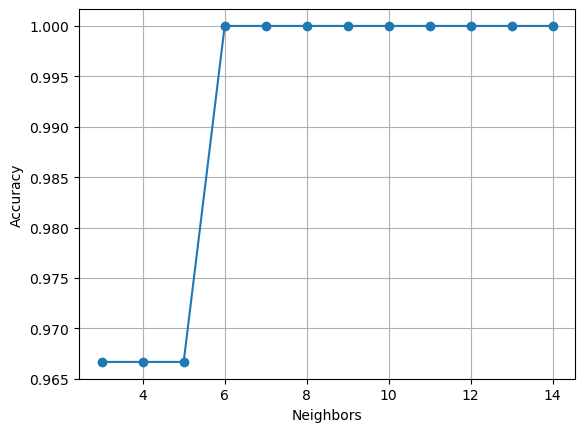

In [49]:
plt.plot(neighbors,metric_k,'o-')
plt.xlabel('Neighbors')
plt.ylabel('Accuracy')
plt.grid()

In [50]:
Classifier=KNeighborsClassifier(n_neighbors=3)
Classifier=Classifier.fit(X_train,y_train)
y_pred_knn_mm=Classifier.predict(X_test)

C:\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [51]:
confusion_matrix(y_test,y_pred_knn_mm)

array([[10,  0,  0],
       [ 0,  8,  1],
       [ 0,  0, 11]], dtype=int64)

In [52]:
acc_knn_mm=accuracy_score(y_test,y_pred_knn_mm)
print('The Accurcy Score of KNN with MinMax scaling is ',round(acc_knn_mm,5))

The Accurcy Score of KNN with MinMax scaling is  0.96667


In [53]:
#9. SVM method using MinMaxScaler linear kernel

In [54]:
clf_svm_mm = SVC(kernel = 'linear')
clf_svm_mm = clf_svm_mm.fit(X_train, y_train)
y_pred_svm_mm = clf_svm_mm.predict(X_test)

In [55]:
confusion_matrix(y_test, y_pred_svm_mm)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

In [56]:
acc_svm_mm = accuracy_score(y_test,y_pred_svm_mm)
print('The Accurcy Score of SVM with MinMax scaling using linear kernel is ',round(acc_svm_mm,5))

The Accurcy Score of SVM with MinMax scaling using linear kernel is  1.0


In [57]:
#10. SVM method using MinMaxScaler rbf kernel

In [58]:
clf_svmr_mm = SVC(kernel = 'rbf')
clf_svmr_mm = clf_svmr_mm.fit(X_train, y_train)
y_pred_svmr_mm = clf_svmr_mm.predict(X_test)

In [59]:
confusion_matrix(y_test, y_pred_svmr_mm)

array([[10,  0,  0],
       [ 0,  8,  1],
       [ 0,  0, 11]], dtype=int64)

In [60]:
acc_svmr_mm = accuracy_score(y_test,y_pred_svmr_mm)
print('The Accurcy Score of SVM with MinMax scaling using rbf kernel is ',round(acc_svmr_mm,5))

The Accurcy Score of SVM with MinMax scaling using rbf kernel is  0.96667


In [61]:
#StandardScaler
X_train, X_test, y_train, y_test = train_test_split(x_ss, y, test_size=0.2, random_state=42)

In [62]:
#11. LogisticRegression using StandardScaler

In [63]:
lr=LogisticRegression()
lr_ss = lr.fit(X_train,y_train)
y_pred_lr_ss = lr_ss.predict(X_test)

In [64]:
confusion_matrix(y_test, y_pred_lr_ss)

array([[10,  0,  0],
       [ 0,  8,  1],
       [ 0,  0, 11]], dtype=int64)

In [65]:
acc_lr_ss = accuracy_score(y_test, y_pred_lr_ss)
print('The Accurcy Score of Logistic Regression with Standard scaling is ',round(acc_lr_ss,5))

The Accurcy Score of Logistic Regression with Standard scaling is  0.96667


In [66]:
#12. KNN using standardscaler

In [67]:
metric_k=[]
neighbors=range(3,15)
for k in neighbors:
    Classifier=KNeighborsClassifier(n_neighbors=k)
    Classifier=Classifier.fit(X_train,y_train)
    y_pred_knn_ss = Classifier.predict(X_test)
    acc_knn_ss = accuracy_score(y_test,y_pred_knn_ss)
    metric_k.append(acc_knn_ss)

C:\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avo

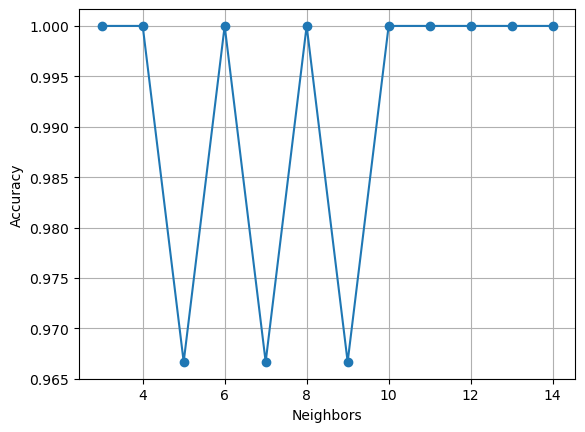

In [68]:
plt.plot(neighbors,metric_k,'o-')
plt.xlabel('Neighbors')
plt.ylabel('Accuracy')
plt.grid()

In [69]:
Classifier=KNeighborsClassifier(n_neighbors=3)
Classifier=Classifier.fit(X_train,y_train)
y_pred_knn_ss = Classifier.predict(X_test)

C:\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [70]:
confusion_matrix(y_test,y_pred_knn_ss)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

In [71]:
acc_knn_ss = accuracy_score(y_test,y_pred_knn_ss)
print('The Accurcy Score of KNN with Standard scaling is ',round(acc_knn_ss,5))

The Accurcy Score of KNN with Standard scaling is  1.0


In [72]:
#13. SVM using standardscaler linear kernel

In [73]:
clf_svm_ss = SVC(kernel= 'linear')
clf_svm_ss = clf_svm_ss.fit(X_train, y_train)
y_pred_svm_ss = clf_svm_ss.predict(X_test)

In [74]:
confusion_matrix(y_test, y_pred_svm_ss)

array([[10,  0,  0],
       [ 0,  8,  1],
       [ 0,  0, 11]], dtype=int64)

In [75]:
acc_svm_ss = accuracy_score(y_test, y_pred_svm_ss)
print('The Accurcy Score of SVM with Standard scaling using linear kernel is ',round(acc_svm_ss,5))

The Accurcy Score of SVM with Standard scaling using linear kernel is  0.96667


In [76]:
#14. SVM using standardscaler rbf kernel

In [77]:
clf_svmr_ss = SVC(kernel= 'rbf')
clf_svmr_ss = clf_svmr_ss.fit(X_train, y_train)
y_pred_svmr_ss = clf_svmr_ss.predict(X_test)

In [78]:
confusion_matrix(y_test, y_pred_svmr_ss)

array([[10,  0,  0],
       [ 0,  8,  1],
       [ 0,  0, 11]], dtype=int64)

In [79]:
acc_svmr_ss = accuracy_score(y_test, y_pred_svmr_ss)
print('The Accurcy Score of SVM with Standard scaling using rbf kernel is ',round(acc_svmr_ss,5))

The Accurcy Score of SVM with Standard scaling using rbf kernel is  0.96667


# classification models that gives the best result are 
1. LogisticRegression without scaling
2. SVM without scaling using linear 
3. SVM without scaling using rbf
4. Decision Tree algorithm
5. Random Forest algorithm
6. SVM with MinMax scaling using linear kernel and
7. KNN with Standard scaling